# Fourier series

In Part III, Computing with Functions, we work with approximating functions by expansions in
bases: that is, instead of approximating at a grid (as in the Differential Equations chapter),
we approximate functions by other, simpler, functions. The most fundamental basis is (complex) Fourier
series:
$$
f(θ) = ∑_{k = -∞}^∞ f̂ₖ {\rm e}^{{\rm i} k θ}
$$
where
$$
f̂ₖ := {1 \over 2π} ∫_0^{2π} f(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ
$$
In numerical analysis we try to build on the analogy with linear algebra as much as possible.
Therefore we write this as:
$$
f(θ) = \underbrace{[⋯ | {\rm e}^{-2{\rm i}θ} |{\rm e}^{-{\rm i}θ} | \underline 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯]}_{F(θ)}
\underbrace{\begin{bmatrix} ⋮ \\ f̂_{-2} \\ f̂_{-1} \\ \underline{f̂_0} \\ f̂_1 \\ f̂_2 \\ ⋮ \end{bmatrix}}_𝐟̂
$$
More precisely, we are going to build an approximation using $n$ approximate coefficients $f̂_k^n ≈ f̂_k$.
We separate this into three cases:
1. Odd: If $n = 2m+1$ we approximate
$$
\begin{align*}
f(θ) &≈ ∑_{k = -m}^{m} f̂ₖ^n {\rm e}^{{\rm i} k θ} \\
    &= \underbrace{[ {\rm e}^{-{\rm i}mθ} | ⋯ | {\rm e}^{-2{\rm i}θ} |{\rm e}^{-{\rm i}θ} | 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯ |  {\rm e}^{{\rm i} m θ}]}_{F_{-m:m}(θ)} \begin{bmatrix} f̂_{-m}^n \\ ⋮ \\ f̂_m^n \end{bmatrix}
\end{align*}
$$
2. Even: If $n = 2m$ we approximate
$$
\begin{align*}
f(θ) &≈ ∑_{k = -m}^{m-1} f̂ₖ^n {\rm e}^{{\rm i} k θ} \\
    &= \underbrace{[ {\rm e}^{-{\rm i}mθ} | ⋯ | {\rm e}^{-2{\rm i}θ} |{\rm e}^{-{\rm i}θ} | 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯ |  {\rm e}^{{\rm i} (m-1) θ}]}_{F_{-m:m-1}(θ)} \begin{bmatrix} f̂_{-m}^n \\ ⋮ \\ f̂_{m-1}^n \end{bmatrix}
\end{align*}
$$
3. Taylor: if we know the negative coefficients vanish ($0 = f̂_{-1} = f̂_{-2} = ⋯$) we approximate
$$
\begin{align*}
f(θ) &≈ ∑_{k = 0}^{n-1} f̂ₖ^n {\rm e}^{{\rm i} k θ} \\
    &= \underbrace{[ 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯ |  {\rm e}^{{\rm i} (n-1) θ}]}_{F_{0:n-1}(θ)} \begin{bmatrix} f̂_0^n \\ ⋮ \\ f̂_{n-1}^n \end{bmatrix}
\end{align*}
$$
This can be thought of as an approximate Taylor expansion using the change-of-variables $z = {\rm e}^{{\rm i}θ}$.

## 1. Basics of Fourier series



In analysis one typically works with continuous functions and relates results to continuity.
In numerical analysis we inheritely have to work with _vectors_, so it is more natural 
to  focus on the case where the _Fourier coefficients_ $f̂_k$ are _absolutely convergent_,
or in otherwords, the $1$-norm of $𝐟̂$ is bounded:
$$
\|𝐟̂\|_1 = ∑_{k=-∞}^∞ |f̂_k| < ∞
$$

We first state a basic results (whose proof is beyond the scope of this module):


**Theorem (convergence)**
If the Fourier coeffients are absolutely convergent then
$$
f(θ) = ∑_{k = -∞}^∞ f̂ₖ {\rm e}^{{\rm i} k θ},
$$
which converges uniformly.

**Remark (advanced)** We also have convergence for the continuous version
of the $2$-norm,
$$
\| f \|_2 := \sqrt{\int_0^{2π} |f(θ)|^2 {\rm d} θ},
$$
for any function such that $\| f \|_2 < ∞$, but we won't need that in
what follows.


Fortunately, continuity gives us sufficient (though not necessary) conditions for absolute convergence:

**Proposition (differentiability and absolutely convergence)** If $f : ℝ → ℂ$ and $f'$ are periodic
 and $f''$ is uniformly bounded, then its Fourier coefficients satisfy
$$
\|𝐟̂\|₁ < ∞
$$

**Proof**
Integrate by parts twice using the fact that $f(0) = f(2π)$, $f'(0) = f(2π)$:
$$
\begin{align*}
f̂ₖ &= ∫_0^{2π} f(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ = 
[f(θ) {\rm e}^{-{\rm i} k θ}]_0^{2π} + {1 \over {\rm i} k} ∫_0^{2π} f'(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ \\
&= {1 \over {\rm i} k} [f'(θ) {\rm e}^{-{\rm i} k θ}]_0^{2π} - {1 \over k^2} ∫_0^{2π} f''(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ \\
&= - {1 \over k^2} ∫_0^{2π} f''(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ
\end{align*}
$$
thus uniform boundedness of $f''$ guarantees $|f̂ₖ| ≤ M |k|^{-2}$ for some $M$, and we have
$$
∑_{k = -∞}^∞ |f̂ₖ| ≤ |f̂_0|  + 2M ∑_{k = 1}^∞ |k|^{-2}  < ∞.
$$
using the dominant convergence test.

∎

This condition can be weakened to Lipschitz continuity but the proof is  beyond the scope
of this module. 
Of more practical importance is the other direction: the more times differentiable a function the
faster the coefficients decay, and thence the faster Fourier series converges. 
In fact, if a function is smooth and 2π-periodic its Fourier coefficients decay
faster than algebraically: they decay like $O(k^{-λ})$ for any $λ$. This will be explored in the
problem sheet.

**Remark (advanced)** Going further, if we let $z = {\rm e}^{{\rm i} θ}$ then if $f(z)$ is _analytic_ in a
neighbourhood of the unit circle the Fourier coefficients decay _exponentially fast_. And if $f(z)$ is entire
they decay even faster than exponentially.


## 2. Trapezium rule and discrete Fourier coefficients

Let $θ_j = 2πj/n$ for $j = 0,1,…,n$ denote $n+1$ evenly spaced points over $[0,2π]$.
The _Trapezium rule_ over $[0,2π]$ is the approximation:
$$
∫_0^{2π} f(θ) {\rm d}θ ≈ {2 π \over n} \left[{f(0) \over 2} + ∑_{j=1}^{n-1} f(θ_j) + {f(2 π) \over 2} \right]
$$
But if $f$ is periodic we have $f(0) = f(2π)$ we get the _periodic Trapezium rule_:
$$
∫_0^{2π} f(θ) {\rm d}θ ≈ 2 π\underbrace{{1 \over n} ∑_{j=0}^{n-1} f(θ_j)}_{Σ_n[f]}
$$
Define the Trapezium rule approximation to the Fourier coefficients by:
$$
f̂_k^n := Σ_n[f(θ) {\rm e}^{-i k θ}]  = {1 \over n} ∑_{j=0}^{n-1} f(θ_j) {\rm e}^{-i k θ_j}
$$

**Lemma (Discrete orthogonality)**
We have:
$$
∑_{j=0}^{n-1} {\rm e}^{i k θ_j} = \begin{cases} n & k = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}
$$
In other words,
$$
Σ_n[{\rm e}^{i (k-j) θ_j}] = \begin{cases} 1 & k-j = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}.
$$

**Proof**

Consider $ω := {\rm e}^{{\rm i} θ_1} = {\rm e}^{2 π {\rm i} \over n}$.  
This is an $n$ th root of unity: $ω^n = 1$.  Note that ${\rm e}^{{\rm i} θ_j} ={\rm e}^{2 π {\rm i} j \over n}= ω^j$.  

(Case 1) Suppose $k$ is a multiple of $n$, that is, $k = p n$ for an integer $p$.  
Then we have 
$$
∑_{j=1}^n {\rm e}^{i k θ_j} = ∑_{j=1}^n ω^{kj} = ∑_{j=1}^n ({ω^{pn}})^j =   ∑_{j=1}^n 1 = n
$$
(Case 2)  Recall that
$$
∑_{j=0}^{n-1} z^j = {z^n-1 \over z-1}.
$$
Then we have
$$
∑_{j=1}^n {\rm e}^{i k θ_j} = ∑_{j=1}^n (ω^k)^j = {ω^{kn} -1 \over ω^k -1} = 0.
$$
where we use the fact that $k$ is not a multiple of $n$ to guarantee that $ω^k ≠ 1$.

∎


**Theorem (discrete Fourier coefficients)** 
If $𝐟̂$ is absolutely convergent then
$$
f̂_k^n = ⋯ + f̂_{k-2n} + f̂_{k-n} + f̂_k + f̂_{k+n} + f̂_{k+2n} + ⋯
$$

**Proof**
$$
\begin{align*}
f̂_k^n &= Σ_n[f(θ) {\rm e}^{-i k θ}] = ∑_{j=-∞}^∞ f̂ⱼ Σ_n[f(θ) {\rm e}^{i (j-k) θ}] \\
&= ∑_{j=-∞}^∞ f̂ⱼ \begin{cases} 1 & j-k = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}
\end{align*}
$$
∎

Note that there is redundancy:

**Corollary (aliasing)**
For all $m ∈ ℤ$, $f̂_k^n = f̂_{k+mn}^n$.


In other words if we know $f̂_0^n, …, f̂_{n-1}^n$, we know all $f̂_k^n$. 
We first discuss the case when all negative coefficients are zero,
noting that the Fourier series is in fact a Taylor series if we let $z = {\rm e}^{{\rm i} θ}$:
$$
f(z) = \sum_{k=0}^∞ f̂_k z^k.
$$
That is, $f̂_0^n, …, f̂_{n-1}^n$ are approximations of the Taylor series coefficients by evaluating
on the boundary.



We can  prove _convergence_ whenever of this
approximation whenever $f$ has absolutely summable coefficients.
We will prove the result here in the special case where the negative
coefficients are zero.


**Theorem (Taylor series converges)** 
If $0 = f̂_{-1} = f̂_{-2} = ⋯$ and $𝐟̂$ is absolutely convergent then
$$
f_n(θ) = ∑_{k=0}^{n-1} f̂_k^n {\rm e}^{{\rm i} k θ}
$$
converges uniformly to $f(θ)$. 

**Proof**

$$
\begin{align*}
|f(θ) - f_n(θ)| = |∑_{k=0}^{n-1} (f̂_k - f̂_k^n) {\rm e}^{{\rm i} k θ} + ∑_{k=n}^∞ f̂_k {\rm e}^{{\rm i} k θ}|
= |∑_{k=n}^∞ f̂_k ({\rm e}^{{\rm i} k θ} - {\rm e}^{{\rm i} {\rm mod}(k,n) θ})|
≤ 2 ∑_{k=n}^∞ |f̂_k|
\end{align*}
$$
which goes to zero as $n → ∞$.
∎

For the general case we need to choose a range of coefficients that includes roughly equally:
if $n$ is odd we use
$$
f_n(θ) = ∑_{k=-⌈n/2⌉}^{⌊n/2⌋} f̂ₖ {\rm e}^{{\rm i} k θ}
$$
In the problem sheet we will prove this converges provided the coefficients are absolutely convergent.








## 3. Discrete Fourier transform and interpolation

We note that the map from values to coefficients can be defined as a matrix-vector product using the DFT:


**Definition (DFT)** 
The _Discrete Fourier Transform (DFT)_ is defined as:
$$
\begin{align*}
Q_n &:= {1 \over √n} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & {\rm e}^{-{\rm i} θ_1} & {\rm e}^{-{\rm i} θ_2} & ⋯ & {\rm e}^{-{\rm i} θ_{n-1}} \\
                                    1 & {\rm e}^{-{\rm i} 2 θ_1} & {\rm e}^{-{\rm i} 2 θ_2} & ⋯ & {\rm e}^{-{\rm i} 2θ_{n-1}} \\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & {\rm e}^{-{\rm i} (n-1) θ_1} & {\rm e}^{-{\rm i} (n-1) θ_2} & ⋯ & {\rm e}^{-{\rm i} (n-1) θ_{n-1}}
\end{bmatrix} \\
&= {1 \over √n} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & ω^{-1} & ω^{-2} & ⋯ & ω^{-(n-1)}\\
                                    1 & ω^{-2} & ω^{-4} & ⋯ & ω^{-2(n-1)}\\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & ω^{-(n-1)} & ω^{-2(n-1)} & ⋯ & ω^{-(n-1)^2}
\end{bmatrix}
\end{align*}
$$
for the $n$-th root of unity $ω = {\rm e}^{{\rm i} π/n}$. Note that
$$
\begin{align*}
Q_n^⋆ &= {1 \over √n} \begin{bmatrix} 
1 & 1 & 1&  ⋯ & 1 \\
1 & {\rm e}^{{\rm i} θ_1} & {\rm e}^{{\rm i} 2 θ_1} & ⋯ {\rm e}^{{\rm i} (n-1) θ_1} \\
1 &  {\rm e}^{{\rm i} θ_2}  & {\rm e}^{{\rm i} 2 θ_2} & ⋯ {\rm e}^{{\rm i} (n-1)θ_2} \\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & {\rm e}^{{\rm i} θ_{n-1}} & {\rm e}^{{\rm i} 2 θ_{n-1}} & ⋯ {\rm e}^{{\rm i} (n-1) θ_{n-1}}
\end{bmatrix} \\
&= {1 \over √n} \begin{bmatrix} 
1 & 1 & 1&  ⋯ & 1 \\
1 & ω^{1} & ω^{2} & ⋯ & ω^{(n-1)}\\
1 & ω^{2} & ω^{4} & ⋯ & ω^{2(n-1)}\\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & ω^{(n-1)} & ω^{2(n-1)} & ⋯ & ω^{(n-1)^2}
\end{bmatrix} \\
&= {1 \over √n} [𝟏 | \exp({\rm i} 𝛉^n) | … | \exp({\rm i}(n-1) 𝛉^n)] 
\end{align*}
$$

That is, we have
$$
\underbrace{\begin{bmatrix} f_0^n \\ ⋮ \\ f_{n-1}^n \end{bmatrix}}_{𝐟̂ⁿ} = {1 \over √n} Q_n \underbrace{\begin{bmatrix} f(θ₀) \\ ⋮ \\ f(θₙ) \end{bmatrix}}_{𝐟ⁿ}
$$

The choice of normalisation constant is motivated by the following:

**Proposition (DFT is Unitary)** $Q_n$ is unitary: $Q_n^⋆ Q_n = Q_n Q_n^⋆ = I$.

**Proof**
$$
Q_n Q_n^⋆  = \begin{bmatrix} Q_n[1] & Q_n[{\rm e}^{{\rm i} θ}] & ⋯ & Q_n[{\rm e}^{{\rm i} (n-1) θ}] \\
                            Q_n[{\rm e}^{-{\rm i} θ}] & Q_n[1] & ⋯ & Q_n[{\rm e}^{{\rm i} (n-2) θ}] \\
                            ⋮ & ⋮ & ⋱ & ⋮ \\
                            Q_n[{\rm e}^{-{\rm i}(n-1) θ}] & Q_n[{\rm e}^{-{\rm i}(n-2) θ}] & ⋯ & Q_n[1] 
                            \end{bmatrix} = I
$$
∎

In other words, $Q_n$ is easily inverted and we also have a map from discrete Fourier coefficients back to values:
$$
\sqrt{n} Q_n^⋆ 𝐟̂ⁿ = 𝐟ⁿ
$$

**Corollary (Interpolation)**
$f_n(θ)$ interpolates $f$ at $θⱼ$:
$$
f_n(θⱼ) = f(θ_j)
$$

**Proof**
We have
$$
f_n(θⱼ) = ∑_{k=0}^{n-1} f̂ₖⁿ {\rm e}^{{\rm i} k θ_j} = √n 𝐞_j^⊤ Q_n^⋆ 𝐟̂ⁿ = 𝐞_j^⊤ Q_n^⋆ Q_n 𝐟ⁿ = f(θⱼ).
$$

∎


We will leave extending this result to the problem sheet. Note that regardless of choice of coefficients
we interpolate, though some interpolations are better than others:

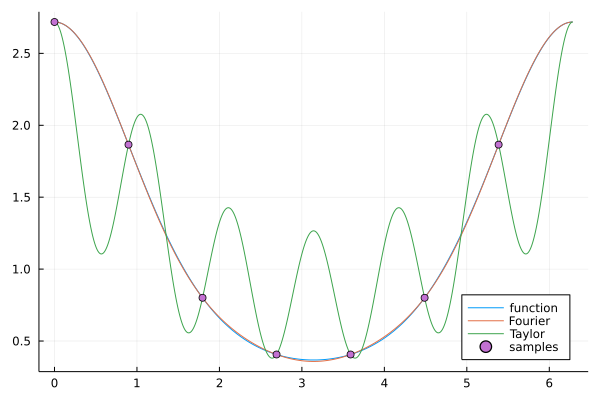

In [1]:
using Plots, LinearAlgebra


# evaluates f_n at a point
function finitefourier(𝐟̂ₙ, θ)
    m = n ÷ 2 # use coefficients between -m:m
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:m
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    for k = -m:-1
        ret += 𝐟̂ₙ[end+k+1] * exp(im*k*θ)
    end
    ret
end

function finitetaylor(𝐟̂ₙ, θ)
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:n-1
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    ret
end


f = θ -> exp(cos(θ))
n = 7
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]
𝐟̂ₙ = 1/sqrt(n) * Qₙ * f.(θ)


fₙ = θ -> finitefourier(𝐟̂ₙ, θ)
tₙ = θ -> finitetaylor(𝐟̂ₙ, θ)

g = range(0, 2π; length=1000) # plotting grid
plot(g, f.(g); label="function", legend=:bottomright)
plot!(g, real.(fₙ.(g)); label="Fourier")
plot!(g, real.(tₙ.(g)); label="Taylor")
scatter!(θ, f.(θ); label="samples")

## 4. Fast Fourier Transform

Applying $Qₙ$ or its adjoint $Q_n^⋆$ to a vector naively takes $O(n^2)$ operations.
Both can be reduced to $O(n \log n)$ using the celebrated _Fast Fourier Transform_,
which is one of the [Top 10 Algorithms of the 20th Century](https://pi.math.cornell.edu/~web6140/)
(You won't believe number 7!).

The key observation is that, if $n$ is even, then contained in $Q_n$ is
$Q_{n ÷ 2}$. It is convenient here to drop the $√n$ so define $F_n := √n Q_n$
and as we will work with multiple grids denote the evenly spaced grid with $n$ points
as $θ_j^n := {2π j \over n}$. First note that if $n$ is even the grids interlace:
$$
𝛉^{2n} = P_σ^⊤ \begin{bmatrix}  𝛉^n \\ 𝛉^n + {π \over n} \end{bmatrix}
$$
where $σ$ has the Cauchy notation
$$
\begin{pmatrix}
1 & 2 & 3 & ⋯ & n & n+1 & ⋯ & 2n \\
1 & 3 & 5 & ⋯ & 2n-1 & 2 & ⋯ & 2n
\end{pmatrix}
$$
That is, $P_σ$ is the following matrix which takes the even entries
and places them in the first $n$ entries and the odd entries in the
last $n$ entries:

In [2]:
n = 4
σ = [1:2:2n-1; 2:2:2n]
P_σ = I(2n)[σ,:]

8×8 SparseMatrixCSC{Bool, Int64} with 8 stored entries:
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1

Note that we therefore have:
$$
𝛚_{2n}^k = P_σ^⊤ \begin{pmatrix} \exp(im*k*𝛉^{n}) \\  \exp(im*k*(𝛉^{n} + {π \over n})) \end{pmatrix} 
= P_σ^⊤ \begin{bmatrix} I_n \\  ω_{2n}^k I_n \end{bmatrix}  𝛚_{n}^k
$$
Thus we have
$$
F_{2n} = \begin{bmatrix} 𝟏_{2n} | 𝛚_{2n} | 𝛚_{2n}^2 | ⋯ | 𝛚_{2n}^{2n-1} \end{bmatrix} =
P_σ^⊤ \begin{bmatrix} 𝟏_{n} &   𝛚_n        & 𝛚_n^2          & ⋯ & 𝛚_n^{n-1}          & 𝛚_n^n  & ⋯ & 𝛚_n^{2n-1}  \\
                        𝟏_{n} & ω_{2n} 𝛚_n & ω_{2n}^2 𝛚_n^2 & ⋯ & ω_{2n}^{n-1} 𝛚_n^{n-1} & ω_{2n}^n 𝛚_n^n  & ⋯ & ω_{2n}^{2n-1} 𝛚_n^{2n-1}
\end{bmatrix} =P_σ^⊤ \begin{bmatrix} F_n & F_n \\
                                     F_n D_n & -F_n D_n
                                     \end{bmatrix} = 
                                     P_σ^⊤ \begin{bmatrix} F_n \\ &F_n \end{bmatrix} \begin{bmatrix} I_n & I_n \\ D_n & -D_n \end{bmatrix}å
$$
In other words, we reduced the DFT to two DFTs applied to vectors of half the dimension.

We can see this formula in code:

In [3]:
function fftmatrix(n)
    θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
    [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]
end

F₂ₙ = fftmatrix(2n)'
Fₙ = fftmatrix(n)'
Dₙ = Diagonal([exp(im*k*π/n) for k=0:n-1])
(P_σ'*[Fₙ Fₙ; Fₙ*Dₙ -Fₙ*Dₙ])[1:n,1:n] ≈ F₂ₙ[1:n,1:n]

true

Now assume $n = 2^q$ so that $\log_2 n = q$. To see that we get $O(n \log n) = O(n q)$ operations we need to count the operations.
Assume that applying $F_n$ takes $3n q$ additions and multiplications. The first $n$ rows takes $n$ additions. The last $n$ has $n$ multiplications and $n$ additions.
Thus we have $3nq + 3n = 3n(q+1) = 3 n \log_2(2n)$ additions/multiplications, showing by induction that we have $O(n \log n)$ operations.



**Remark** The FFTW.jl package wraps the FFTW (Fastest Fourier Transform in the West) library, 
which is a highly optimised implementation
of the FFT that also works well even when $n$ is not a power of 2.
(As an aside, the creator of FFTW [Steven Johnson](https://math.mit.edu/~stevenj/) is now a 
Julia contributor and user.)
 Here we approximate $\exp(\cos(θ-0.1))$ using
31 nodes:

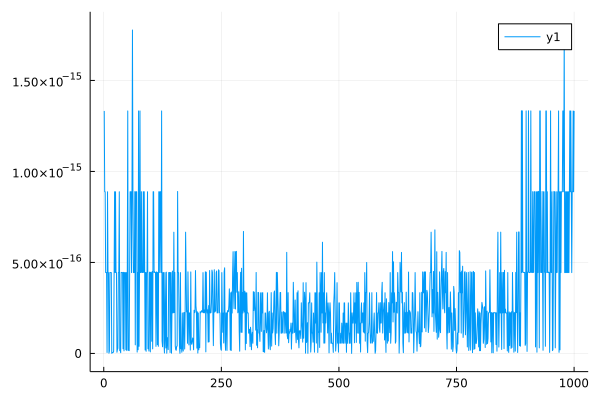

In [4]:
using FFTW
f = θ -> exp(cos(θ-0.1))
n = 31
m = n÷2
# evenly spaced points from 0:2π, dropping last node
θ = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[f̂ⁿ_0, …, f̂ⁿ_(n-1)]
fc = fft(f.(θ))/n

# We reorder using [f̂ⁿ_(-m), …, f̂ⁿ_(-1)] == [f̂ⁿ_(n-m), …, f̂ⁿ_(n-1)]
#  == [f̂ⁿ_(m+1), …, f̂ⁿ_(n-1)]
f̂ = [fc[m+2:end]; fc[1:m+1]]

# equivalent to f̂ⁿ_(-m)*exp(-im*m*θ) + … + f̂ⁿ_(m)*exp(im*m*θ)
fₙ = θ -> transpose([exp(im*k*θ) for k=-m:m]) * f̂

# plotting grid
g = range(0, 2π; length=1000)
plot(abs.(fₙ.(g) - f.(g)))

Thus we have successfully approximate the function to roughly machine precision.
The magic of the FFT is because it's $O(n \log n)$ we can scale it to very high orders.
Here we plot the Fourier coefficients for a function that requires `n = 100_001`
coefficients to resolve:

In [5]:
f = θ -> exp(sin(θ))/(1+1e9cos(θ)^2)
n = 100_001
m = n÷2
# evenly spaced points from 0:2π, dropping last node
θ = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[f̂ⁿ_0, …, f̂ⁿ_(n-1)]
fc = fft(f.(θ))/n


# We reorder using [f̂ⁿ_(-m), …, f̂ⁿ_(-1)] == [f̂ⁿ_(n-m), …, f̂ⁿ_(n-1)]
#  == [f̂ⁿ_(m+1), …, f̂ⁿ_(n-1)]
f̂ = [fc[m+2:end]; fc[1:m+1]]

plot(abs.(fc); yscale=:log10, legend=:bottomright, label="default")
plot!(abs.(f̂); yscale=:log10, label="reordered")

## 5. Differentiation

Fourier series present an effective way of computing derivatives and solving differential equations.
This is seen naturally as follows:
$$
\begin{align*}
f'(θ) = {{\rm d} \over {\rm d}θ} F(θ) 𝐟 &= 
 [⋯ | -2{\rm i}{\rm e}^{-2{\rm i}θ} -{\rm i}|{\rm e}^{-{\rm i}θ} | \underline 0 | {\rm i} {\rm e}^{{\rm i}θ} | 2{\rm i}{\rm e}^{2{\rm i}θ} | ⋯]
𝐟 \\
&= F(θ) \underbrace{{\rm i} \begin{bmatrix} ⋱ \\ &-2 \\ && -1 \\ &&&\underline{0} \\ &&&& 1 \\  &&&&& 2 \\ &&&&&& ⋱\end{bmatrix}}_{D} 𝐟.
\end{align*}
$$
This translates naturally to the finite expansions: 
$$
\begin{align*}
f_n'(θ) = {{\rm d} \over {\rm d}θ} F_{-m:m}(θ) 𝐟\\
&=F_{-m:m}(θ) \underbrace{{\rm i} \begin{bmatrix} -m \\ &⋱ \\ && m\end{bmatrix}}_{D[-m:m,-m:m]} 𝐟.
\end{align*}
$$


Differentiating with Fourier series is _much_ more accurate than finite differences:

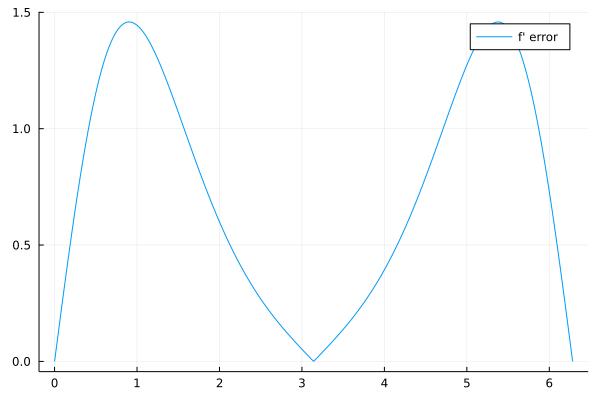

In [6]:
n = 31
m = n÷2
# evenly spaced points from 0:2π, dropping last node
θ = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[f̂ⁿ_0, …, f̂ⁿ_(n-1)]
fc = fft(f.(θ))/n

# We reorder using [f̂ⁿ_(-m), …, f̂ⁿ_(-1)] == [f̂ⁿ_(n-m), …, f̂ⁿ_(n-1)]
#  == [f̂ⁿ_(m+1), …, f̂ⁿ_(n-1)]
f̂ = [fc[m+2:end]; fc[1:m+1]]

D = im*Diagonal(-m:m)
f = θ -> exp(cos(θ))
fpₙ = θ -> transpose([exp(im*k*θ) for k=-m:m]) * D * f̂
fp = θ -> -sin(θ)*exp(cos(θ))

plot(g, abs.(fpₙ.(g) .- fp.(g)); label="f' error")

We can also compose derivatives to compute higher order derivatives:

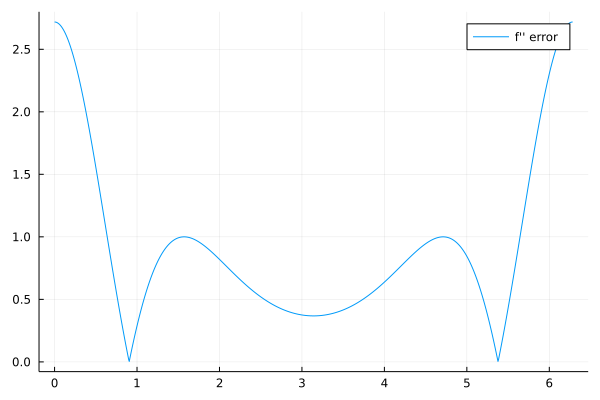

In [7]:
fppₙ = θ -> transpose([exp(im*k*θ) for k=-m:m]) * D^2 * f̂
fpp = θ -> (-cos(θ) + sin(θ)^2)*exp(cos(θ))
plot(g, abs.(fppₙ.(g) .- fpp.(g)); label="f'' error")

Note there is a limit to how much accuracy is maintained: the derivatve `D^λ` will magnify errors like `n^λ`. 

This is not as accurate as using dual numbers, but only requires the ability to evaluate a function pointwise.
Further, we can use this construction for solving differential equations, something that is not possible with
dual numbers.

**WARNING** `x'` is actually the _conjugate transpose_ and `dot` automatically conjugates the first argument.
That is why above we use `transpose`.



## 6. Multiplication and Circulant matrices


We are now going to consider an application of FFTs: fast multiplication of polynomials. We will do this by relating in to
To utilise the FFT we first need to change this rectangular Toeplitz matrix to a square Circulant 
matrix:

**Definition (Circulant)** A _Circulant matrix_
is an $n × n$ Toeplitz matrix
which "wraps around":
$$
\underbrace{\begin{bmatrix}
a_0 & a_{n-1} & ⋯ & a_1 \\
a_1 & a_0 & ⋱ & ⋮ \\
⋮ & ⋱ & ⋱ 
a_{n-1} & ⋯ & a_1 & a_0 \end{bmatrix}}_C
$$

Here is an example construction:

In [8]:
function circulantmatrix(𝐚)
    n = length(𝐚)
    C = zeros(eltype(𝐚), n, n)
    for k = 1:n, j = 1:n
        C[k,j] = 𝐚[mod(k-j,n)+1]
    end
    C
end
𝐚 = [1,3,2,5,9] # coefficients
C  = circulantmatrix(𝐚)

5×5 Matrix{Int64}:
 1  9  5  2  3
 3  1  9  5  2
 2  3  1  9  5
 5  2  3  1  9
 9  5  2  3  1

**Theorem (Circulant diagonalization)**
The DFT matrix diagonalises a Circulant matrix:
$$
C Q_n = Q_n \begin{bmatrix} a(1) \\ & ⋱ \\ && a(ω^{n-1}) \end{bmatrix}
$$
where
$$
a(z) = ∑_{k=0}^{n-1} a_k z^k
$$
and $ω = \exp(2π{\rm i}/n)$.

**Proof**
Consider the circulant shift matrix:
$$
\underbrace{
\begin{bmatrix}
0   &&& 1
\\ 1 \\
& ⋱ \\ &&1 & 0
\end{bmatrix}
}_S
$$
so that $C = a_0 I  + a_1 S + ⋯ + a_{n-1} S^{n-1}$. Note $S$ is a permutation matrix, hence it is orthogonal ($S^⊤ S = I$),
normal, and is diagonalisable. We verify directly that $Q_n$ is its eigenvector matrix (use the fact that $ω^{-(n-j)} = ω^j$):
$$
\begin{align*}
S Q_n &= {1 \over √n} \begin{bmatrix} 1 & ω^{-(n-1)} & ω^{-2(n-1)} & ⋯ & ω^{-(n-1)^2} \\
                                        1 & 1 & 1&  ⋯ & 1 \\
                                    1 & ω^{-1} & ω^{-2} & ⋯ & ω^{-(n-1)}\\
                                    1 & ω^{-2} & ω^{-4} & ⋯ & ω^{-2(n-1)}\\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & ω^{-(n-2)} & ω^{-2(n-2)} & ⋯ & ω^{-(n-2)^2} \end{bmatrix} \\
&= Q_n \underbrace{\begin{bmatrix} 1 \\ & ω \\ && ⋱ \\ &&& ω^{n-1} \end{bmatrix}}_Λ
\end{align*}
$$
Thus we get:
$$
C Q_n = \sum_{k=0}^{n-1} a_k S^k Q_n = Q_n \sum_{k=0}^{n-1} a_k Λ^k = Q_n \begin{bmatrix} ∑_{k=0}^{n-1} \\ & ∑_{k=0}^{n-1} a_k ω^k  \\ &&⋱ \\  & ∑_{k=0}^{n-1} a_k ω^{(n-1)k} \end{bmatrix}
$$

∎

Here is a numerical example using `fft` and `ifft` to
apply $Q_n$ and $Q_n^⊤$ fast:

In [9]:
n = 1000
𝐚 = randn(n)
𝐛 = randn(n)
C = circulantmatrix(𝐚)

a =  θ -> transpose([exp(im*k*θ) for k=0:n-1])*𝐚

Λ = Diagonal(a.(θ))
norm(C*𝐛 - fft(Λ * ifft(𝐛)))

LoadError: DimensionMismatch("second dimension of D, 31, does not match length of V, 1000")

It has worked! (Though unfortunately has introduced more numerical error
than `C*𝐛`.)

**Remark (advanced)** The FFT is built on the fact that $ω$ is a root of unity,
and this observation can be used to extend the FFT to other algebraic structures
such as finite fields or groups. This connection can also be used to design a method for multiplying
large integers with $n$ digits in $O(n \log n)$ operations. 



### Polynomial multiplication


Consider multiplication of two polynomials of at most degree $n-1$ (if we have polynomials of different degree
we can pad their coefficients to be of the same size), which we can write in matrix form in terms of a Toeplitz
matrix (one with constant diagonals):
$$
\begin{align*}
a(z)b(z) = \left(∑_{k=0}^{n-1} a_k z^k\right) \left(∑_{j=0}^{n-1} b_j z^j\right) = 
∑_{k=0}^{n-1} ∑_{j=0}^{n-1} a_k b_j z^{k+j}  \\
= \underbrace{
\begin{bmatrix}
a_0 \\ 
a_1 & a_0 \\ 
⋮ & ⋱ & ⋱ \\ 
a_{n-2} & ⋯ & a_1 & a_0\\
a_{n-1} & a_{n-2} & ⋯ & a_1 & a_0\\
 &⋱ & ⋱ & ⋱ & a_1 \\
 && a_{n-1} & a_{n-2} & ⋮\\
 &&& a_{n-1} & a_{n-2} \\
 &&&& a_{n-1} 
\end{bmatrix}}_T
 \underbrace{\begin{bmatrix} b_0 \\ ⋮ \\ b_{n-1} \end{bmatrix}}_𝐛
\end{align*}
$$
where $T ∈ ℂ^{2n-1 × n}$. (Note the roles of $a$ and $b$ can be swapped due to commutativity,
but for concreteness
we define $T$ in terms of $a$.)
Each row takes $O(n)$ operations to apply so the total cost is $O(n^2)$ operations. We will
see that the FFT can reduce this to $O(n \log n)$.

In particular, we pad $b$ with zeros and pad $T$ on the right to obtain:
$$
a(z) b(z) = T 𝐛 = \underbrace{\begin{bmatrix}
a_0 & & &  & & a_{n-1} & ⋯ & a_2 & a_1 \\ 
a_1 & a_0 &&&&& a_{n-1} & ⋯ & a_2 \\
⋮ & ⋱ & ⋱ &&&&& ⋱ &  ⋮ \\ 
a_{n-2} & ⋯ & a_1 & a_0 &&&&& a_{n-1}  \\ 
a_{n-1} & a_{n-2} & ⋯ & a_1 & a_0\\
 &⋱ & ⋱ & ⋱ & a_1 & a_0 \\
 && a_{n-1} & a_{n-2} & ⋮ & ⋱ & ⋱ \\
 &&& a_{n-1} & a_{n-2}  & ⋯ & a_1 & a_0\\
 &&&& a_{n-1} & a_{n-2} & ⋯ & a_1 & a_0
\end{bmatrix}}_C \begin{bmatrix} 𝐛 \\ 𝟎 \end{bmatrix}
$$
that is, $C ∈ ℂ^{2n-1 × 2n-1}$ satisfies
$$
\begin{align*}
C[1:2n-1,1:n] = T \\
C[1:n
\end{align*}

$$A = T[1:n,1:n]$ and $B = T[n+1:2n,1:n]$.

Here is a low dimensional example. Suppose we want to multiply 
$$
c(z) = (∑_{k=0}^5 (k+1) z^k) (∑_{k=0}^5 (k+1)^2 z^k)
$$
The coefficients are given by:

In [10]:
n = 6
T = zeros(Int, 2n-1, n)
for j = 1:n, k = j:j+n-1
    T[k,j] = k-j+1
end
T

11×6 Matrix{Int64}:
 1  0  0  0  0  0
 2  1  0  0  0  0
 3  2  1  0  0  0
 4  3  2  1  0  0
 5  4  3  2  1  0
 6  5  4  3  2  1
 0  6  5  4  3  2
 0  0  6  5  4  3
 0  0  0  6  5  4
 0  0  0  0  6  5
 0  0  0  0  0  6

And the coefficients of $c$ are given by

In [11]:
T * (1:6).^2

11-element Vector{Int64}:
   1
   6
  20
  50
 105
 196
 280
 342
 365
 330
 216

To do this fast we extend it to be circulant:

In [12]:
𝐚 = [1:6; zeros(Int,5)]
C = circulantmatrix(𝐚)

11×11 Matrix{Int64}:
 1  0  0  0  0  0  6  5  4  3  2
 2  1  0  0  0  0  0  6  5  4  3
 3  2  1  0  0  0  0  0  6  5  4
 4  3  2  1  0  0  0  0  0  6  5
 5  4  3  2  1  0  0  0  0  0  6
 6  5  4  3  2  1  0  0  0  0  0
 0  6  5  4  3  2  1  0  0  0  0
 0  0  6  5  4  3  2  1  0  0  0
 0  0  0  6  5  4  3  2  1  0  0
 0  0  0  0  6  5  4  3  2  1  0
 0  0  0  0  0  6  5  4  3  2  1

And indeed we recover the same coefficients via:

In [13]:
C * [(1:6).^2; zeros(Int, 5)]

11-element Vector{Int64}:
   1
   6
  20
  50
 105
 196
 280
 342
 365
 330
 216

This is therefore efficiently computable using the fft
(at the expense of converting integer arithmetic to complex
floating point):

In [14]:
m = length(𝐚)
a =  θ -> transpose([exp(im*k*θ) for k=0:m-1])*𝐚
θ = range(0,2π; length=m+1)[1:end-1]

Λ = Diagonal(a.(θ))
fft(Λ*ifft([(1:6).^2; zeros(Int, 5)]))

11-element Vector{ComplexF64}:
 0.9999999999999432 + 1.0436096431476471e-13im
  5.999999999999972 - 3.513010014740325e-14im
 20.000000000000085 - 6.013860089921237e-14im
  50.00000000000003 - 9.411575281786303e-14im
 105.00000000000018 - 2.858270366338258e-14im
 196.00000000000006 + 2.0581739938969866e-14im
 279.99999999999994 + 2.7194600090286412e-14im
 341.99999999999994 + 1.1570541281240635e-14im
              365.0 - 2.367400626145118e-14im
              330.0 + 4.529864790430905e-14im
 215.99999999999997 + 3.263467025974174e-14im